In [1]:
import polars_bio as pb
import pandas as pd
from polars_bio.io import read_fastq
import polars as pl

INFO:polars_bio:Creating BioSessionContext


In [2]:
df = read_fastq("example2.fastq")
pl.Config.set_tbl_rows(100)

INFO:polars_bio:Table: example2 registered for path: example2.fastq


polars.config.Config

In [3]:
print(pb.sql("SELECT kmer_count(sequence, 3) AS result FROM example2 LIMIT 60").collect())

0rows [00:00, ?rows/s]

shape: (28, 1)
┌───────────┐
│ result    │
│ ---       │
│ struct[2] │
╞═══════════╡
│ {"CTA",2} │
│ {"AAC",1} │
│ {"ACG",1} │
│ {"CCA",3} │
│ {"AAT",4} │
│ {"CTC",3} │
│ {"ATA",3} │
│ {"GGA",1} │
│ {"TCA",2} │
│ {"ATC",1} │
│ {"GCA",3} │
│ {"AAA",6} │
│ {"AGC",5} │
│ {"CCC",1} │
│ {"AGA",1} │
│ {"ACC",2} │
│ {"GAC",1} │
│ {"ATG",4} │
│ {"GCC",1} │
│ {"CAG",1} │
│ {"TAA",2} │
│ {"AGG",1} │
│ {"CAA",5} │
│ {"CGC",1} │
│ {"AAG",3} │
│ {"GTA",3} │
│ {"ACA",2} │
│ {"GAA",1} │
└───────────┘


In [4]:
df2 = read_fastq("example.fastq")
sql_result = pb.sql("SELECT kmer_count(sequence, 3) FROM example").collect()
print(sql_result)



INFO:polars_bio:Table: example registered for path: example.fastq


0rows [00:00, ?rows/s]

shape: (32, 1)
┌─────────────────────────────────┐
│ kmer_count(example.sequence,In… │
│ ---                             │
│ struct[2]                       │
╞═════════════════════════════════╡
│ {"GGA",775}                     │
│ {"GAA",770}                     │
│ {"GCC",595}                     │
│ {"ACA",761}                     │
│ {"AAA",1013}                    │
│ {"TAA",484}                     │
│ {"CGA",181}                     │
│ {"CTC",791}                     │
│ {"AGG",827}                     │
│ {"ACC",515}                     │
│ {"ACT",574}                     │
│ {"TCA",731}                     │
│ {"ATG",684}                     │
│ {"GAC",432}                     │
│ {"AGA",858}                     │
│ {"AGC",645}                     │
│ {"CAG",914}                     │
│ {"CGC",187}                     │
│ {"GTA",410}                     │
│ {"AAG",796}                     │
│ {"CAA",670}                     │
│ {"CCA",819}                     │
│ {"GCA",649}

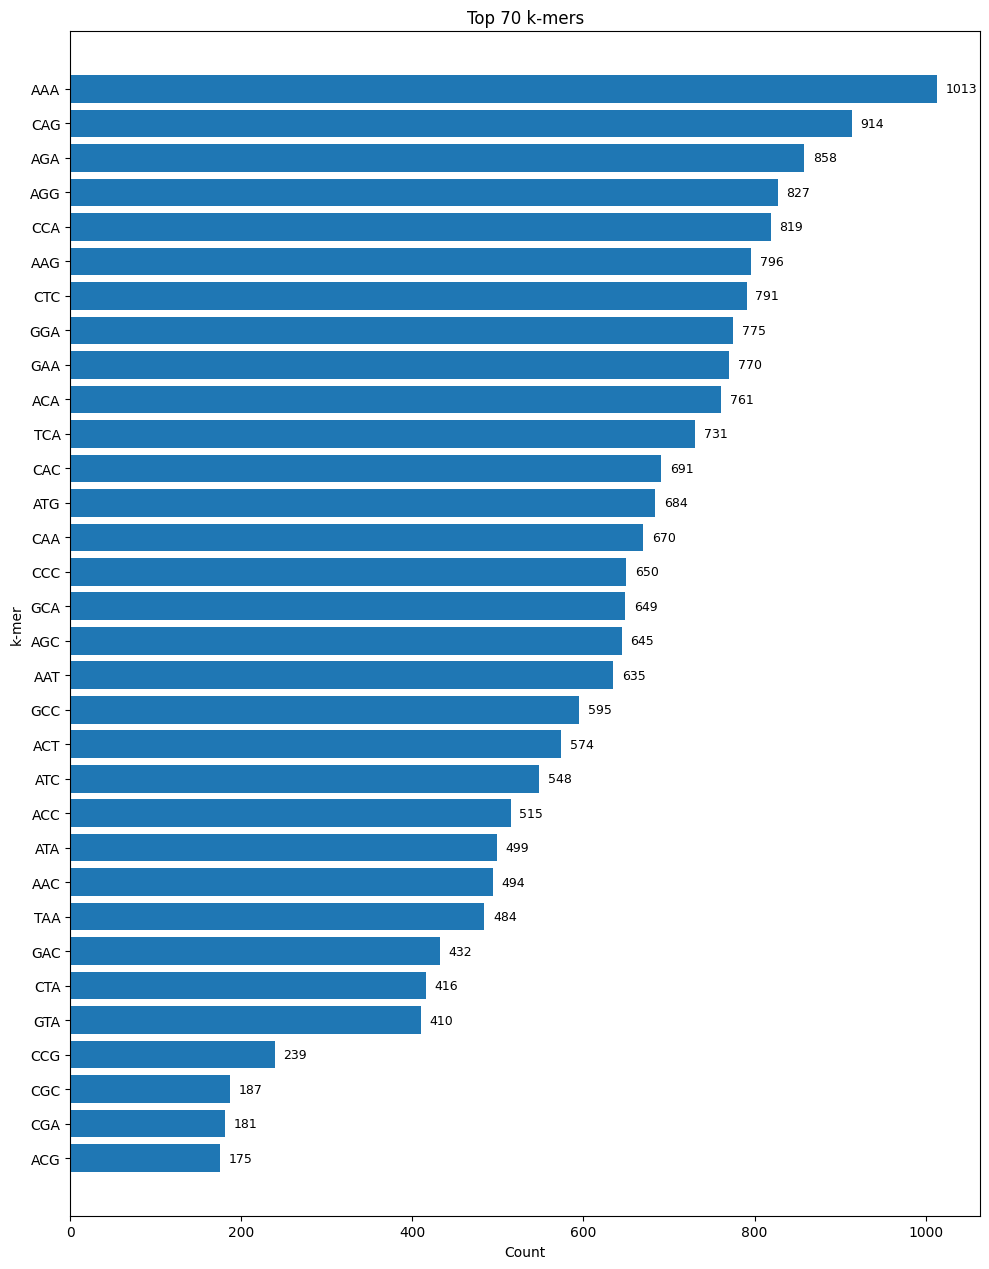

In [5]:
pb.plot_kmer_counts(sql_result, top_n=70)



INFO:polars_bio:Table: example registered for path: example.fastq


0rows [00:00, ?rows/s]

[polars_bio] Execution time: 0.016 seconds
[fastqc-rs] Execution time: 1.304 seconds


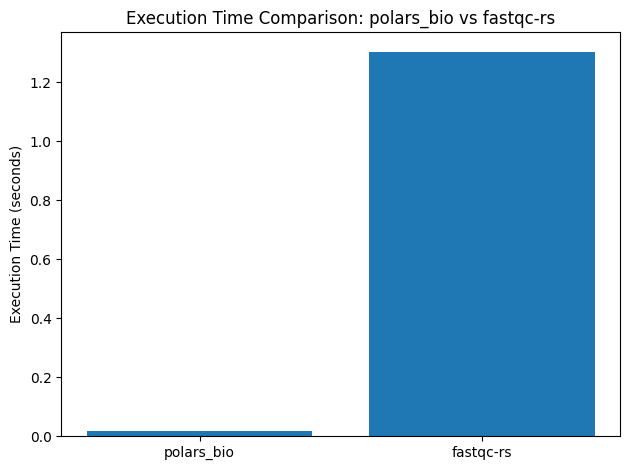

In [ ]:
import time
import subprocess
import matplotlib.pyplot as plt
import polars_bio as pb
from polars_bio.io import read_fastq

df = read_fastq("example.fastq")

# --- polars_bio SQL method ---
start_my = time.time()
result = pb.sql("SELECT kmer_count(sequence, 5) AS result FROM example").collect()
end_my = time.time()
time_polars = end_my - start_my
print(f"[polars_bio] Execution time: {time_polars:.3f} seconds")

# --- fastqc-rs method ---
start_fastqc = time.time()
subprocess.run(
    ["fqc", "-q", "example.fastq", "-k", "5"],
    stdout=subprocess.DEVNULL,
    stderr=subprocess.DEVNULL,
    check=True
)
end_fastqc = time.time()
time_fastqc = end_fastqc - start_fastqc
print(f"[fastqc-rs] Execution time: {time_fastqc:.3f} seconds")

# --- Plot the execution time comparison ---
execution_times = {
    "polars_bio": time_polars,
    "fastqc-rs": time_fastqc
}

fig, ax = plt.subplots()
ax.bar(execution_times.keys(), execution_times.values())
ax.set_ylabel("Execution Time (seconds)")
ax.set_title("Execution Time Comparison: polars_bio vs fastqc-rs")

plt.tight_layout()
plt.show()
